<Center> <h1> Project: Research of the video game market </h1> </Center>

<h1> Data description </h1>

Of the open sources, historical data are available until 2016 about games sales, user and experts, genres and platforms (for example, Xbox or PlayStation).

- `name` - name of the game
- `Platform` - platform
- `year_of_release` - year of release
- `genre` - genre of game
- `na_sales` - sales in North America (millions of copies sold)
- `eu_sales` - sales in Europe (millions of copies sold)
- `jp_sales` - sales in Japan (millions of copies sold)
- `THER_SALALS - sales in other countries (millions of copies sold)
- `Critic_Score` - Critics Assessment (maximum 100)
- `user_score` - user rating (maximum 10)
- `Rating` - rating from ESRB organization (English Entertainment Software Rating Board).

The data set is the abbreviation ESRB (Entertainment Software Rating Board) is an association that determines the age rating of computer games.ESRB evaluates game content and assigns it a suitable age category, for example, “for adults”, “for young children” or “for adolescents”.

- “EC” (“Early Childhood”) - “For young children”: the game is suitable for children from 3 years and older and does not contain materials that parents could consider unacceptable.
- “E” (“EVERYONE”) - “for all”: the content is quite suitable for the age category of 6 years and older;Such games may like adults.
- “E10+” (“EVERYONE 10 and Older”) - “For all 10 years and older.”
- “T” (“teen”) - “teenagers”: the game is suitable for people from 13 years and older.
- “M” (“mature”) - “for adults”: the materials of the game are not suitable for teenagers under 17 years old.
- “AO” (“Adults only 18+”) - “only for adults”: the content of the game only for adults older than 18 years.
- “Rating” (“Rating Pending”) - “The rating is expected”: the product was sent to ESRB and expects to be assigned

<h1> The purpose of the study </h1>

It is necessary to identify the determining success of the game of patterns.This will make it possible to bet on a potentially popular product and plan advertising campaigns to the Streamchik online store, which is selling computer games around the world. It is also necessary to plan 2017.

<h1>Data processing and preparation</h1>

In [71]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats as st

In [72]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [73]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [75]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [76]:
# Give the names of the columns to the lower register
data.columns = [column.lower() for column in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [77]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<h2>Processing of missing values</h2>

In [78]:
# check

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Missing values' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('no misses left :) or there was an error in the first part of the function')

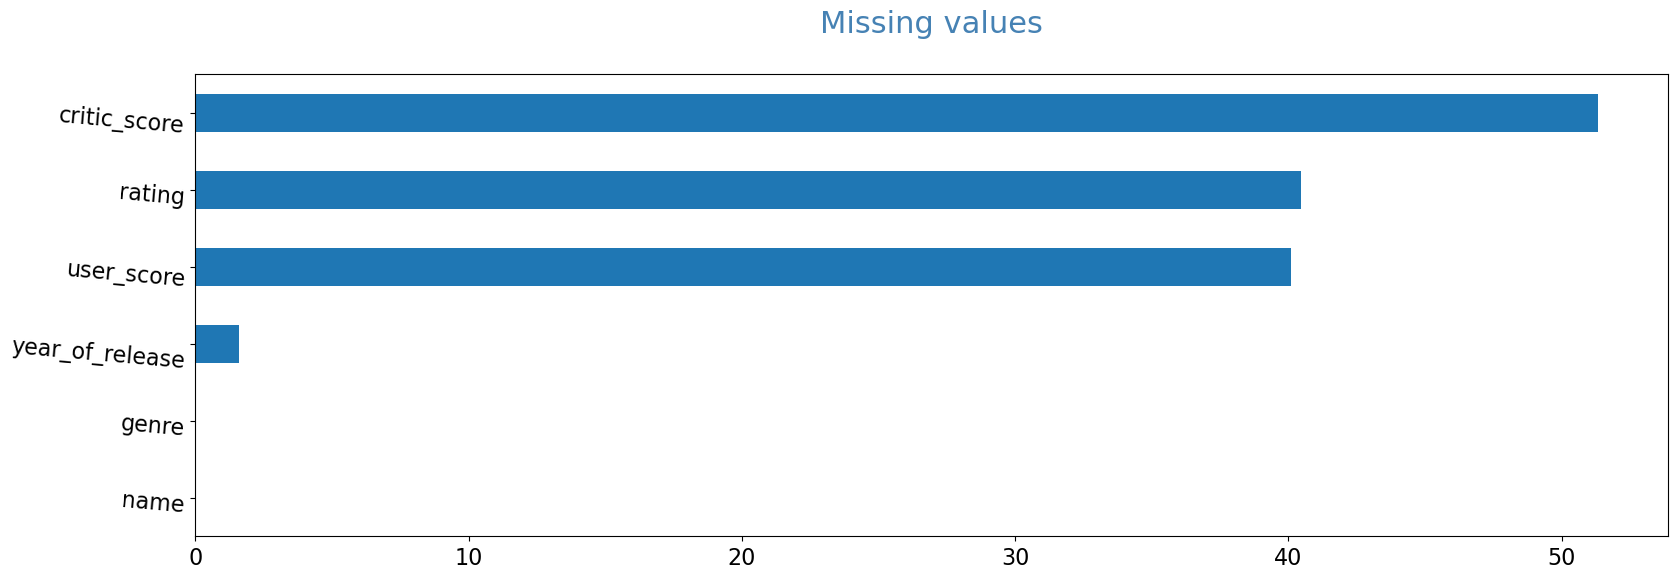

In [79]:
pass_value_barh(data)

In [80]:
# looking for misses values in data
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [81]:
# check for duplicates
data.duplicated().sum()

0

In [82]:
# We are looking for duplicates for key columns
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

2

In [83]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [84]:
# Delete a duplicate containing incomplete data
data.drop(16230, inplace=True)

In [85]:
# Before removing rows with passes in NAME, Genre and Year_of_release, check sales
data[data[['name', 'genre', 'year_of_release']].isna().any(axis=1)].sort_values(by=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], ascending=False).head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN


In [86]:
# delete lines with passes in NAME, GENRE and YEAR_OF_RELEASE
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

# Replace TBD ('to be Determined') with nan
data['user_score'].replace('tbd', np.NaN, inplace=True)

<h3> Justification of processing missing values</h3>
Lines with passes in `name`,` genre`, `year_of_release` are removed due to their small amount, which should not affect the final result, but will make it more precise.

Pillars in columns `Critic_Score`, `user_Score`, and `Rating` are not filled out for the following reasons:
1. Filling in passes can lead to a distortion of real data, becauseestimates are subjective, and the rating is set by an individual
1. There is no access to information to fill in passes
1. If the passes are filled with incorrect values, this can lead to a distortion of the results of statistical analysis.In this case, the game of one genre released on one platform in one year can have completely different indicators of these values.

<h3>Possible causes of missed values</h3>

1. Data collection: In the process of data collection, technical problems, errors when entering data or incompleteness of information sources may occur.
1. optional fields: in some cases, certain fields can be optional for filling, and data owners can simply skip them.This can explain the passes in column, which are estimates of critics, users or ESRB ratings.
1. For some records, certain information may be not applicable.For example, a game can be released only in certain regions, and assessments of users or critics can be available only for these regions.
1. Games older than a certain age can have `year_of_release 'gaps in the column, if information about the year of release has been lost or damaged

<h3>Missed values in ESRB</h3>

In these gaps, this column is probably due to the fact that not for all games the ESRB rating was obtained.For example, some little-known or indie games may not have an ESRB rating.

We will assign "NR" (No Rating) for games without a rating ESRB.

In [87]:
data['rating'] = data['rating'].fillna('NR')

<h2>Transformation of types</h2>

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [89]:
data['rating'].unique()

array(['E', 'NR', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [90]:
data['year_of_release'] = data['year_of_release'].astype('Int32')
data['user_score'] = data['user_score'].astype('float64')
data['rating'] = data['rating'].astype('category')

The values in the `year_of_releas` column (year of release) is advisable to lead them to the type of data of integers.

The `user_score` column contains numerical values of the rating assigned to the games by users.They were represented as lines (Object) - we bring them to the numerical data type (Float64) so that a numerical analysis and calculations can be performed.

`Rating` contains categorical values of the ESRB rating.Bringing to the type 'Category helps to optimize the use of memory and accelerates operations on data in this column

<h2>Calculation of the total values</h2>

In [91]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


<h1>Research analysis of data </h1>

In [92]:
data['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

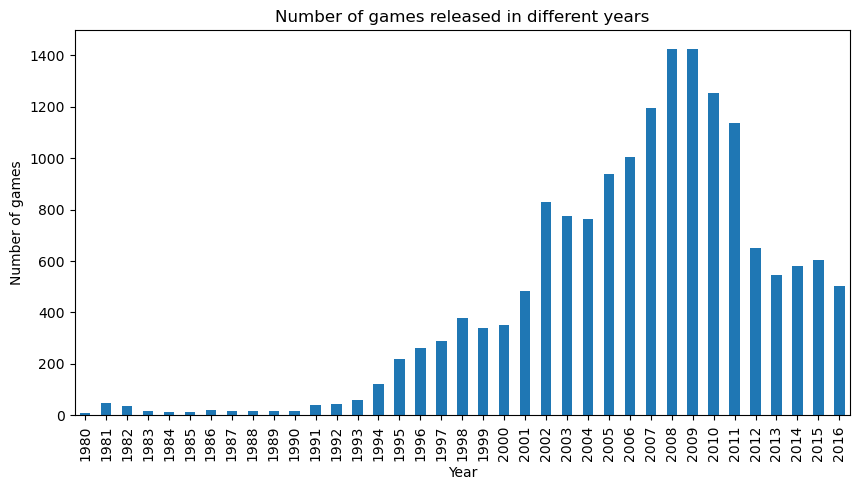

In [93]:
year_games = data['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.title('Number of games released in different years')
year_games.plot(kind='bar')
plt.show()

Analyzing the number of games released in different years, we can notice that until the beginning of the 1990s, the number of games released was relatively few.This may be due to the development of the game industry and the availability of technologies for creating games.

Since 1994, the number of games released begins to grow significantly and reaches a peak in 2008 and 2009.After that, the number of new games begins to gradually decline, which may be associated with increasing competition and focusing developers on the quality of products.

For a more complete analysis of the gaming industry, data for all periods are important, however, for the analysis of modern games and forecasting market trends, it may be worth focusing on later years (since the 2000s and further).

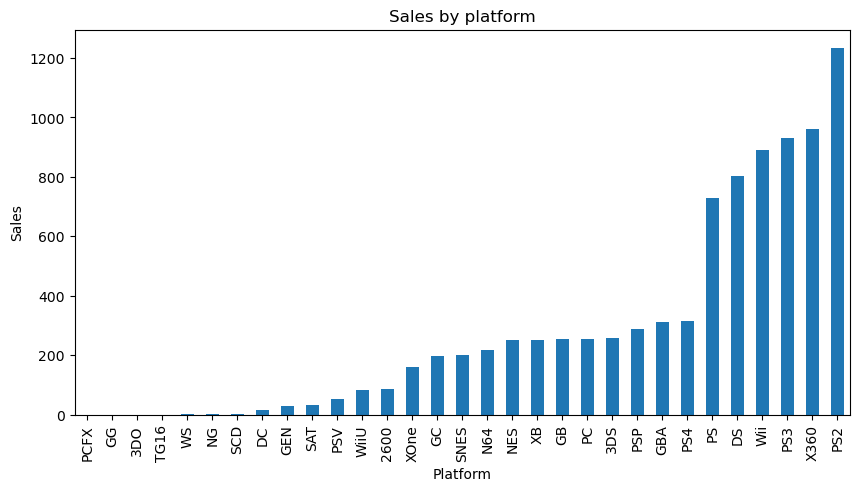

In [94]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=True)
plt.figure(figsize=(10, 5))
platform_sales.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('Sales by platform')
plt.show()

The following observations can be made:

1. Some platforms, such as PCFX, GG and 3DO, have very small values of general sales, which may indicate that they were not widely popular or sales were mainly limited by certain markets.
1. Platforms, such as PS2, X360 and PS3, have the highest values of total sales.This confirms their popularity and widespread around the world.
1. The newer platforms, such as Xone and WIIU, have relatively low values of general sales, which may be associated with their later appearance on the market and fewer games released on these platforms compared to older platforms.
1. There are platforms with sales in the "average" segment, for example, PC, 3DS, PSP, GBA, etc., which may indicate their stable popularity among certain segments of gamers or regional markets.

In [95]:
top_platforms = platform_sales.sort_values(ascending=False).head(5)
top_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

In [96]:
# Function for building sales by year
def yearly_sales(platform, data):
    yearly_sales = data[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    yearly_sales.plot(kind='bar')
    plt.xlabel('Уear')
    plt.ylabel('Sales')
    plt.title(f'Sales {platform} by year')
    plt.show()

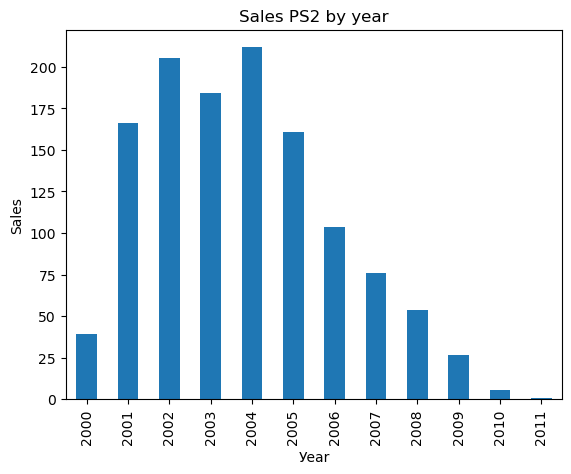

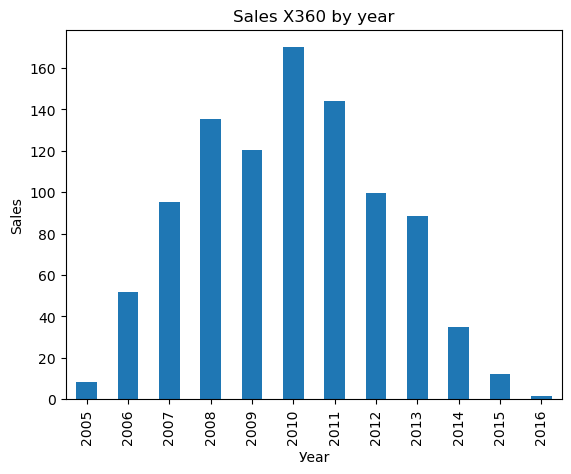

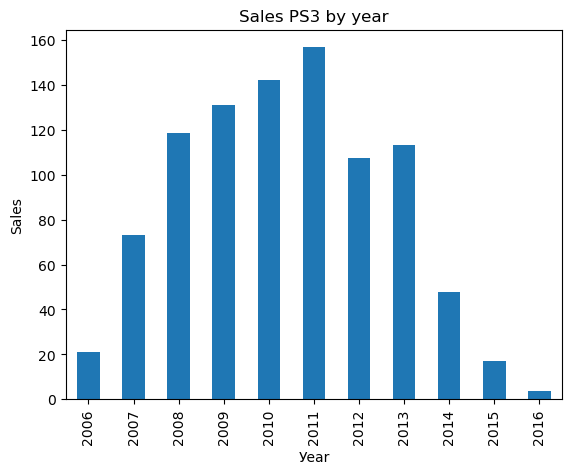

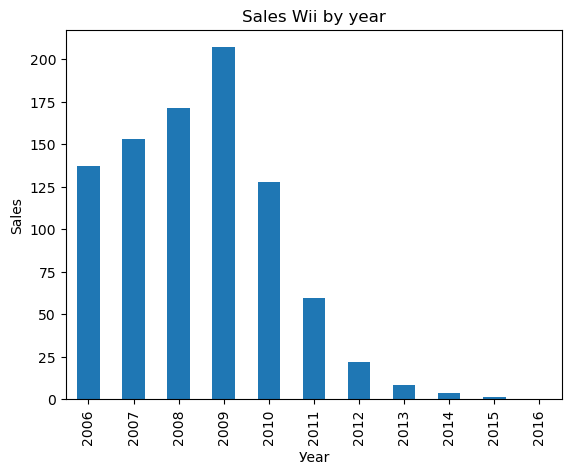

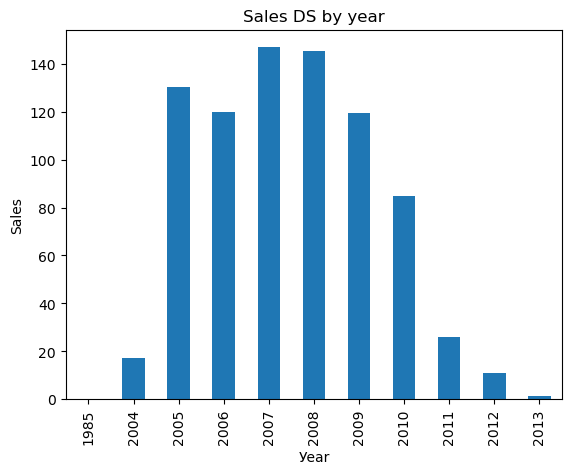

In [97]:
# Cycle for building sales by years for different platforms
for platform in top_platforms.index:
    yearly_sales(platform, data)

Based on the data presented, you can see that the life cycle of the game platform is about 10-12 years.This period includes a phase of active growth and expansion (when the platform only enters the market and is gaining popularity quickly), the peak of popularity (when sales reach their maximum) and then a gradual decrease (when the platform becomes less popular and ultimately becomes obsolete).

For example, PS2 appeared in 2000, reached a peak in 2004, and sales fell significantly by 2011.X360 appeared in 2005, the peak of sales came in 2010, and by 2016 sales were significantly reduced.Similar cycles can be observed for other platforms

In [98]:
#Exploring the release from DS in 1985
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NR,0.02


In [99]:
# Nintendo DS was released in 2004 - we delete the value for 1985
data.drop(15957, inplace=True)

<h2>Actual period</h2>

Based on the analysis of sales on platforms and the life cycle of platforms, it is reasonable to choose the current period that will begin in 2013.This will help focus on recent trends in the industry and see which platforms are actively growing and which are at the stages of extinction.

To build a forecast for 2017, it is worth considering platforms, which either demonstrated stable growth in recent years or hold a high level of sales.

In [100]:
actual_data = data[data['year_of_release'] >= 2014]

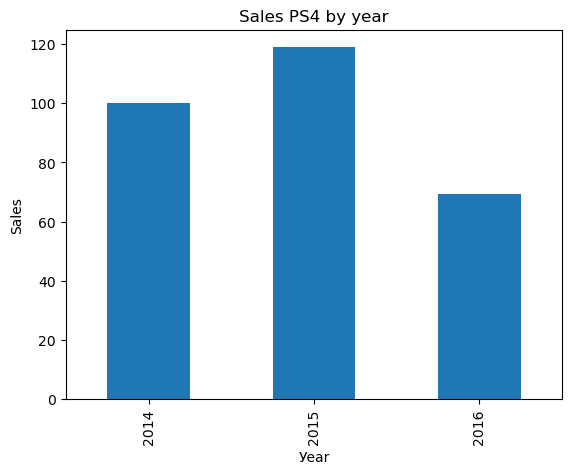

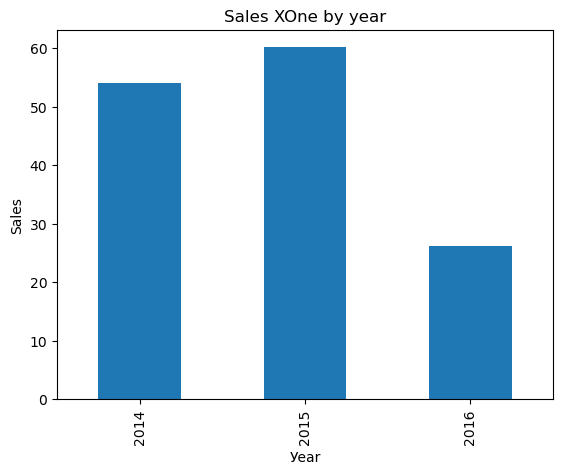

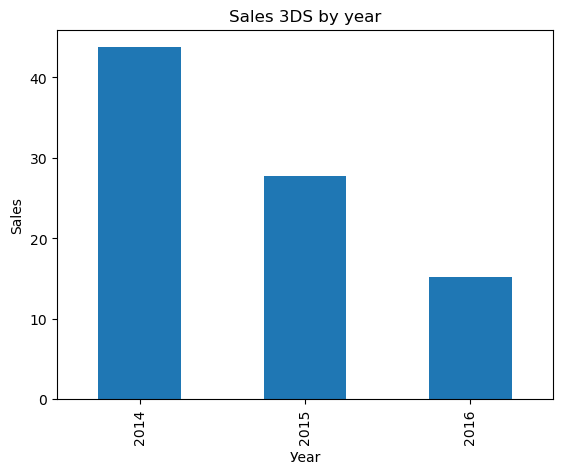

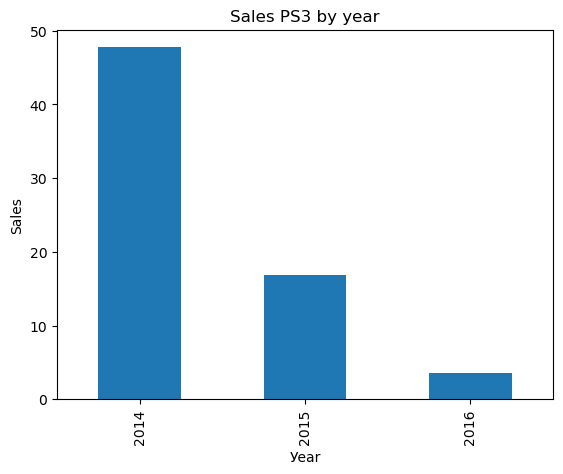

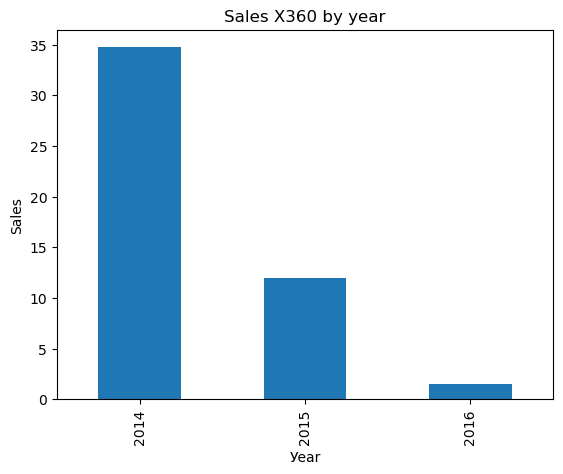

In [101]:
top_platforms_2014 = actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=True).sort_values(ascending=False).head(5)

# Cycle for posting longing over the years for different platforms
for platform in top_platforms_2014.index:
    yearly_sales(platform, actual_data)

To build a forecast for 2017, it is worth considering platforms, which either demonstrated stable growth in recent years or hold a high level of sales.

In our case, we see that the PS4 and Xone platforms issued in 2013 are potentially profitable platforms.They only gain momentum, their sales continue to grow, and they will probably be popular in the coming years.

At the same time, platforms such as PS3 and X360 seem to have already passed the peak of their popularity and now their sales are falling, so they are not of interest to forecasting for 2017.

Text(0, 0.5, 'Platform')

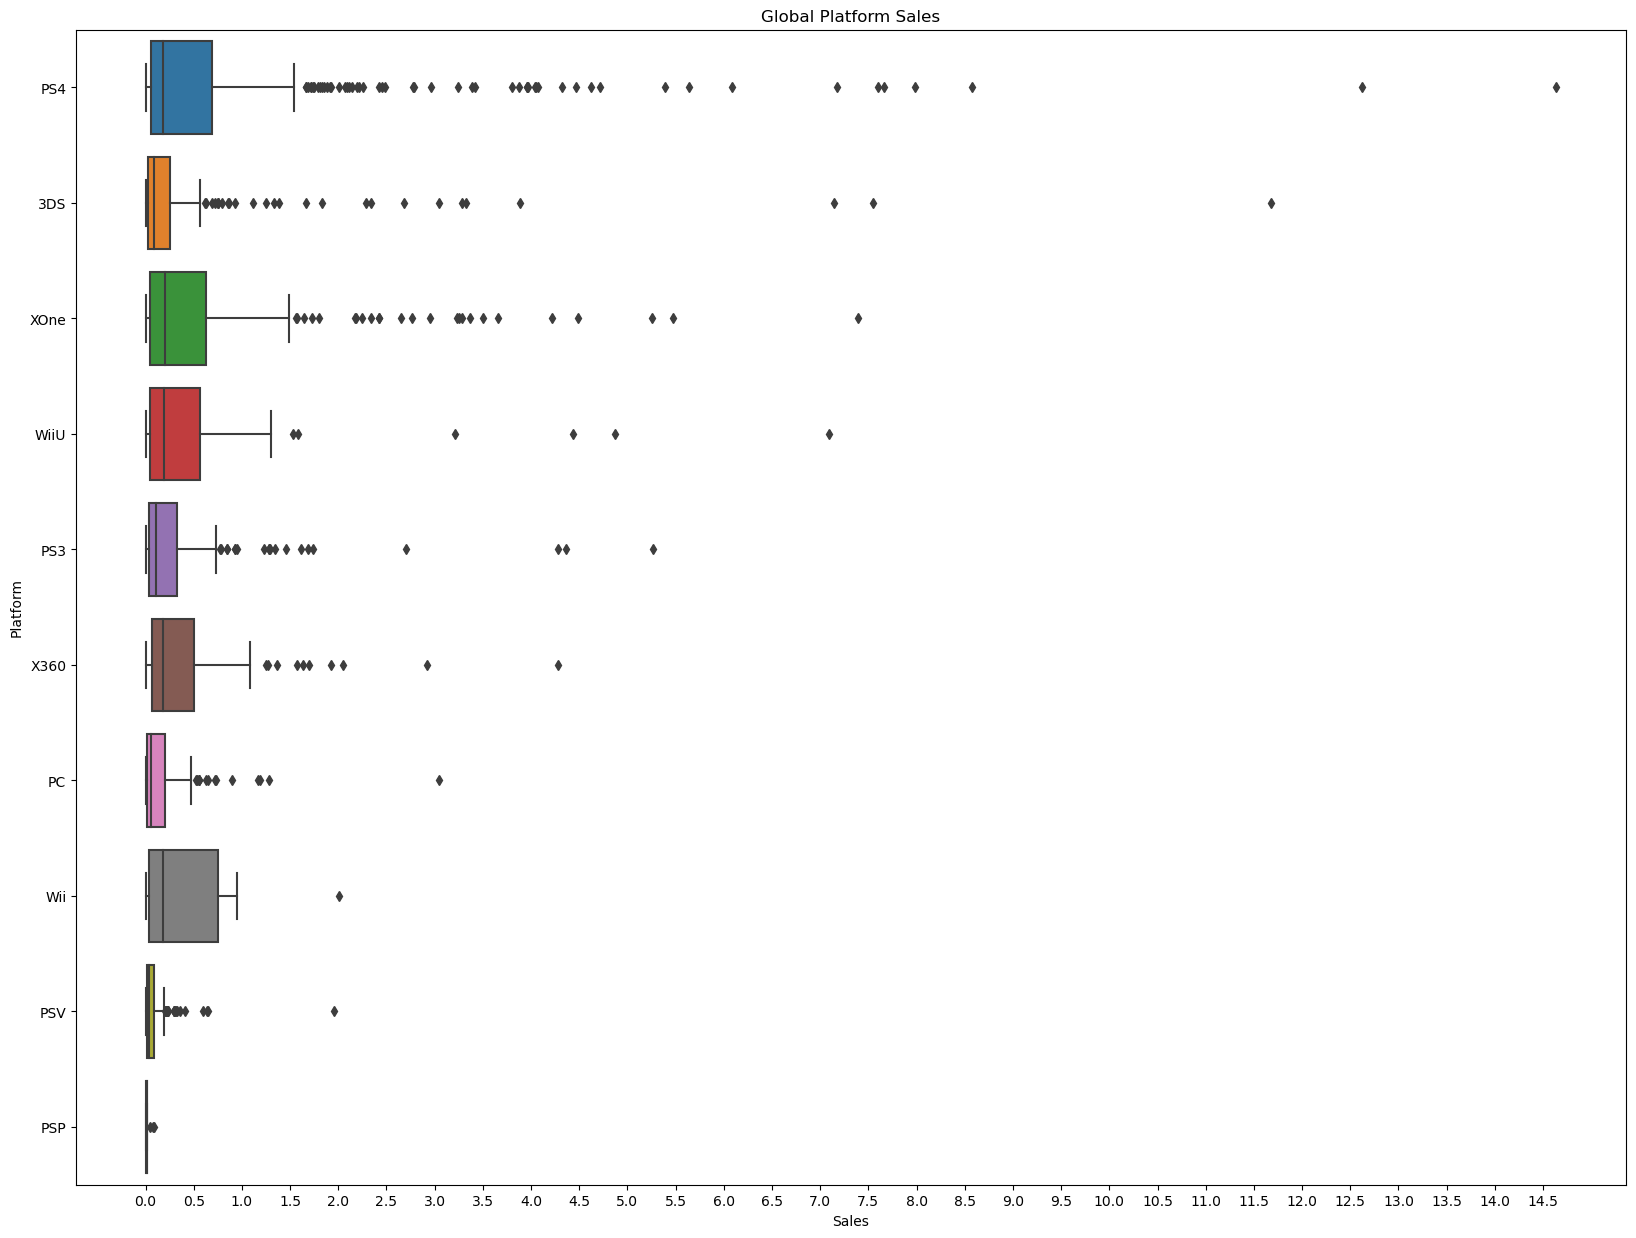

In [102]:
plt.figure(figsize=(20, 15))
sns.boxplot( y=actual_data["platform"], x=actual_data["total_sales"], orient ='h')
plt.xticks(np.arange(0, actual_data["total_sales"].max(), 0.5))
plt.title('Global Platform Sales')
plt.xlabel('Sales')
plt.ylabel('Platform')

You can draw the following conclusions about global sales on platforms:

**PS4:** This platform has an average of the highest sales among all platforms.The distribution of sales demonstrates greater variability, but mainly sales are concentrated in the lower apartment.This indicates the presence of some very successful games, while most games have relatively modest sales.

**3DS:** Sales for 3DS are much lower than for PS4, although there are some emissions that indicate the presence of very successful games.However, in general, sales for this platform are lower.

**Xone:** Sales for Xone are similar to sales for PS4, with some games, the sales of which are much higher than average.This indicates the competitiveness of this platform in the market.

**WIIU:** Sales for WIIU are also distributed with some emissions up.This indicates that there are some games that are sold much better than the rest.

**PS3:** Sales for PS3, it seems, is significantly lower than for other platforms, with a very small number of emissions up.This may indicate the fall in the popularity of this platform.

**x360:** Sales for X360 are similar to sales for PS3, with some emissions up, which indicates the presence of some successful games.

**PC:** Sales for PC are mainly low, with some emissions indicating the presence of very successful games.

**WII:** Sales for WII, it seems, is mostly low, but with some emissions, which indicates the presence of some successful games.

**PSV and PSP:** Sales for these platforms are the lowest, almost without emissions, which indicates a low level of sales for most games on these platforms.

In conclusion, there are significant differences in sales between different platforms.Some platforms, such as PS4 and Xone, have higher sales, while other platforms

<h2>Reviews of users and critics</h2>

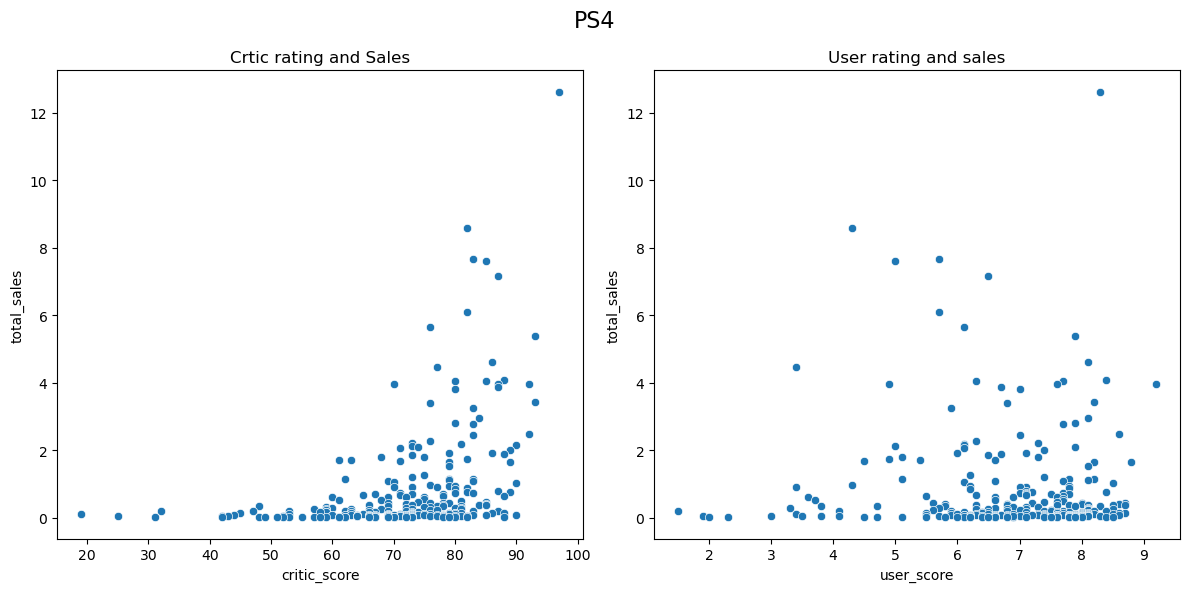

Correlation of user and sales ratings: -0.04
Correlation of evaluation of critics and sales: 0.40


In [103]:
# Анализируем PS4
ps4_data = actual_data[actual_data['platform'] == 'PS4']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales')
plt.title('Crtic rating and Sales')

plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales')
plt.title('User rating and sales')


plt.suptitle('PS4', fontsize=16)
plt.tight_layout()
plt.show()

print('Correlation of user and sales ratings:', '{:.2f}'.format(ps4_data['user_score'].corr(ps4_data['total_sales'])))
print('Correlation of evaluation of critics and sales:', '{:.2f}'.format(ps4_data['critic_score'].corr(ps4_data['total_sales'])))

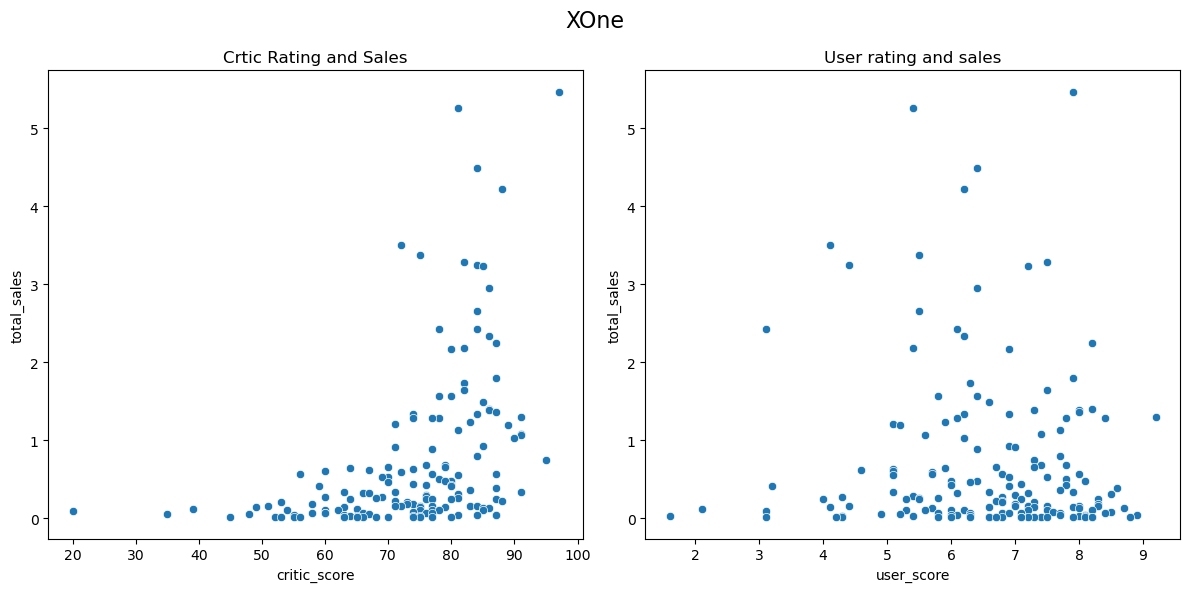

Correlation of Users and Sales Assessment: -0.07
Correlation of evaluation of critics and sales: 0.43


In [104]:
# We analyze the Xone
xone_data = actual_data[actual_data['platform'] == 'XOne']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=xone_data, x='critic_score', y='total_sales')
plt.title('Crtic Rating and Sales')

plt.subplot(1, 2, 2)
sns.scatterplot(data=xone_data, x='user_score', y='total_sales')
plt.title('User rating and sales')


plt.suptitle('XOne', fontsize=16)
plt.tight_layout()
plt.show()

print('Correlation of Users and Sales Assessment:', '{:.2f}'.format(xone_data['user_score'].corr(xone_data['total_sales'])))
print('Correlation of evaluation of critics and sales:', '{:.2f}'.format(xone_data['critic_score'].corr(xone_data['total_sales'])))

**Conclusions:**

1. User reviews (user_score) have a slight correlation with common sales (Total_sales).The correlation coefficient is close to 0, which indicates the absence of a strong connection between these two variables.

1. Critics ratings (Critic_Score), on the other hand, have a moderate correlation with common sales.This indicates that with an increase in the assessments of critics, on average, sales of games for this platform are also increasing.

Thus, the assessments of critics seem to affect the sales of games more than user assessments for both of the considered platforms (PS4 and Xone).However, this influence is not so strong as to be the only factor that determines the success of sales.Other factors, such as the genre of games, brand, advertising, etc., probably also play a significant role.

<h2>Distribution bu Geners</h2>

In [105]:
genres = actual_data['genre'].value_counts().sort_values(ascending=True)
genres

Puzzle           14
Strategy         37
Platform         38
Simulation       44
Fighting         60
Racing           69
Misc            113
Shooter         128
Sports          161
Adventure       185
Role-Playing    221
Action          619
Name: genre, dtype: int64

In [106]:
genres_sales = actual_data.groupby('genre')['total_sales'].sum().sort_values(ascending=True)
genres_sales

genre
Puzzle            2.21
Strategy          3.96
Simulation       13.13
Adventure        17.55
Platform         18.09
Racing           27.52
Fighting         28.22
Misc             37.55
Role-Playing    101.44
Sports          109.48
Shooter         170.94
Action          199.36
Name: total_sales, dtype: float64

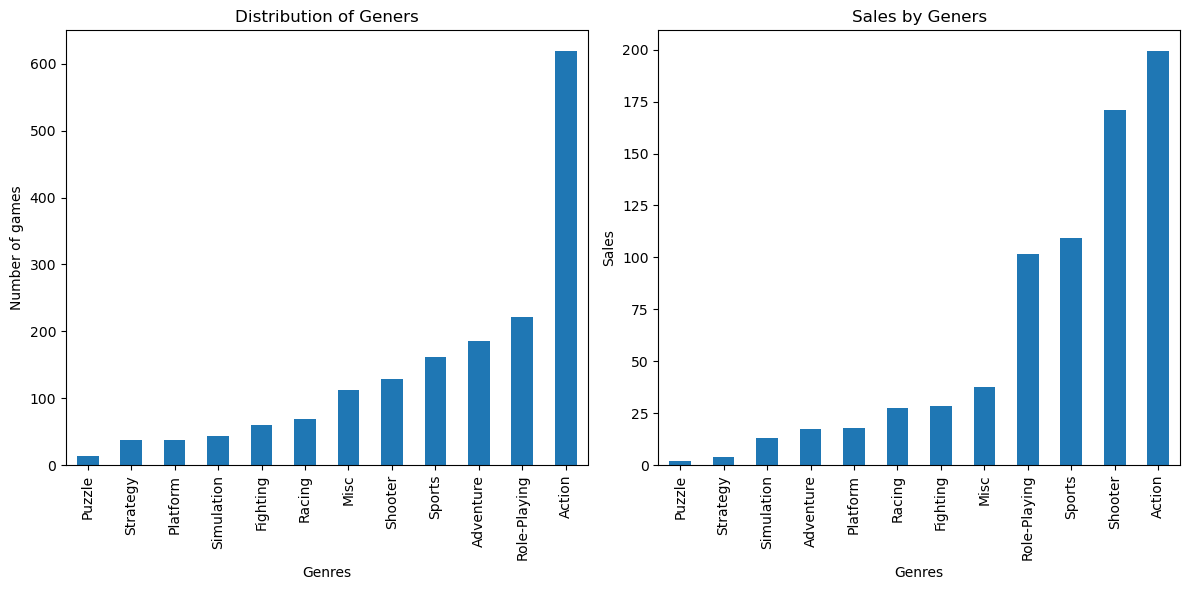

In [107]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
genres.plot(kind='bar')
plt.title('Distribution of Geners')
plt.xlabel('Genres')
plt.ylabel('Number of games')

plt.subplot(1, 2, 2)
genres_sales.plot(kind='bar')
plt.title('Sales by Geners')
plt.xlabel('Genres')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

The most profitable genres according to the data is
- "Shooter",
- "Action"
- And "Sports".

Genres with low sales, such as Puzzle, Strategy and Simulation, probably have a narrower target audience due to the features of the gameplay.

It is interesting to note that the number of games released does not always correlate with the total sales.For example, the "Action" genre has the most released games, but its common sales are slightly less than that of the "Shooter" genre.

Text(0, 0.5, 'Genres')

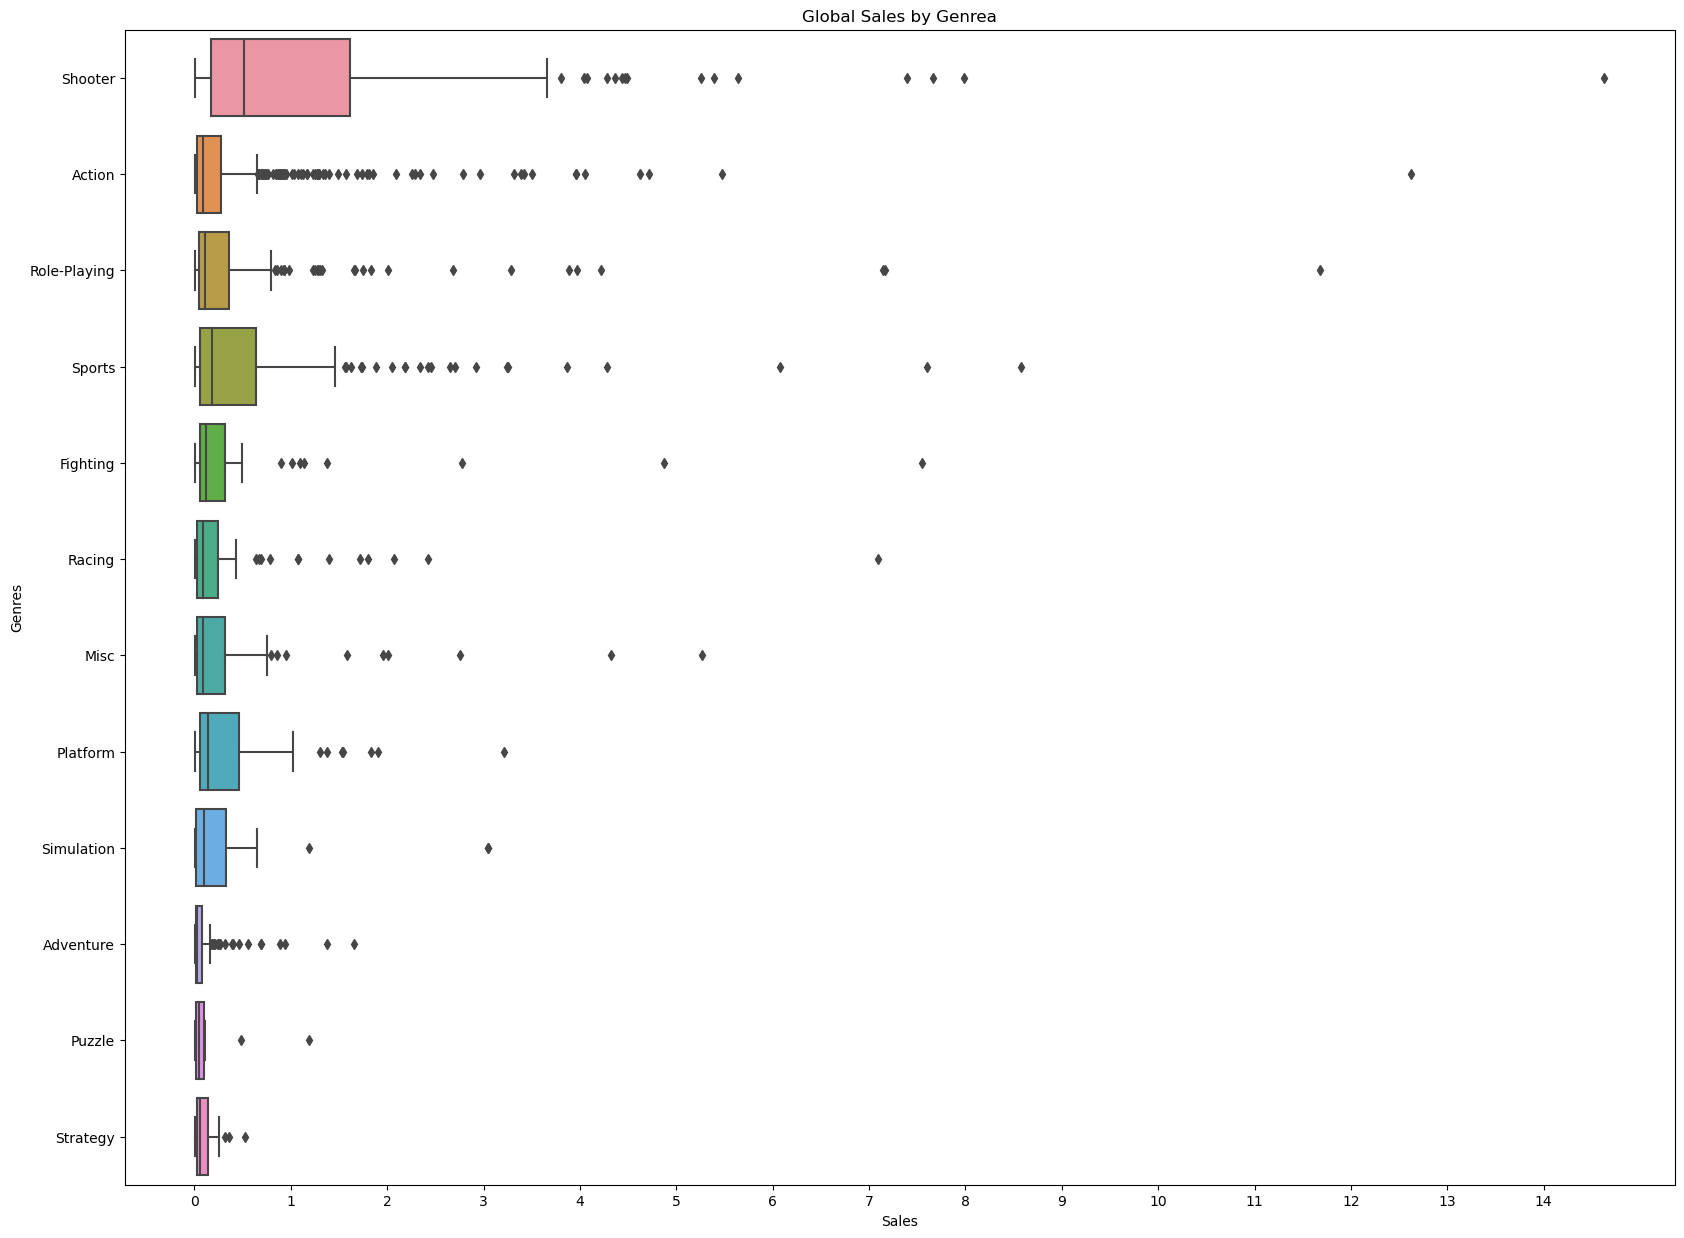

In [108]:
# build a boxplot for sales on genres
plt.figure(figsize=(20, 15))
sns.boxplot( y=actual_data["genre"], x=actual_data["total_sales"], orient ='h')
plt.xticks(np.arange(0, actual_data["total_sales"].max(), 1))
plt.title('Global Sales by Genrea')
plt.xlabel('Sales')
plt.ylabel('Genres')

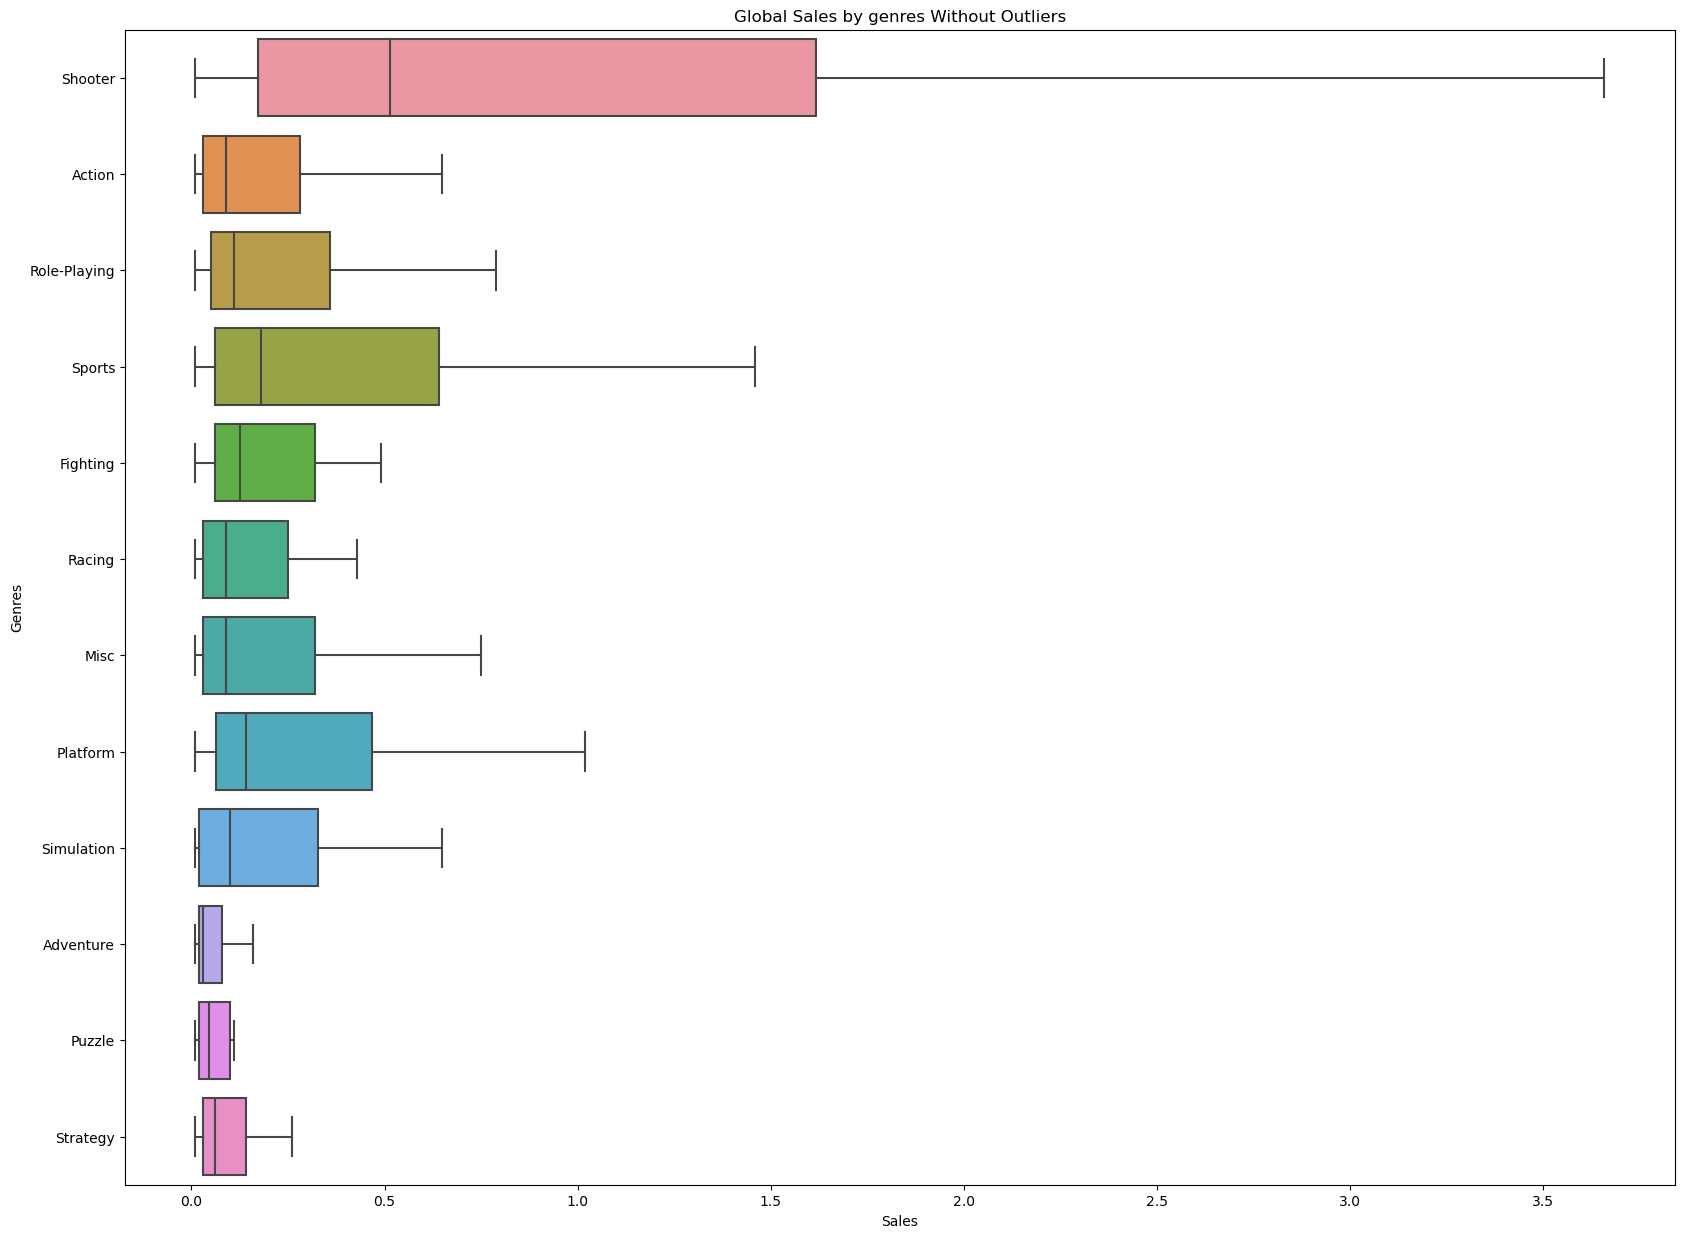

In [123]:
# Build BoxPlot without emissions
plt.figure(figsize=(20, 15))
sns.boxplot( y=actual_data["genre"], x=actual_data["total_sales"], orient ='h', showfliers = False)
plt.title('Global Sales by genres Without Outliers')
plt.xlabel('Sales')
plt.ylabel('Genres')
plt.show()

Based on data and BoxPlot diagrams for various genres, the following conclusions can be drawn:

1. Shooter: This genre shows the highest sales median among all genres.A wide scope and a large number of emissions indicate that this genre has both extremely popular games and less successful releases.

1. Action: Despite the fact that this is a genre with the largest number of games, its median sales is lower than that of many other genres.This may indicate a wide variety of games and saturation of the market in this genre.

1. Role-Playing: Mediana sales of this genre is higher than most other genres, but still less than that of shooters and sports games.Like the Action of Games, there is a wide range of sales.

1. Sports: has a second largest median sales after shooters.The presence of significant emissions may indicate the presence of very popular sports games.

1. Fighting, Racing, Misc, Platform: These genres have similar median sales.The distribution of values in these genres is shifted to the left, which indicates the presence of a small number of very successful games and a large number of games with moderate sales.

1. Simulation: has the average value of sales among all genres.There are also several emissions, which indicates the presence of certain games that demonstrate outstanding sales.

1. Adventure, Puzzle, Strategy: these are genres with the least sales medians.Probably, games in these genres are not as popular as in others.

In general, Boxplot speaks of significant differences in sales between different Games.Genres, such as shooters and sports games, usually show the greatest sales, while strategies, puzzles and adventures are at the other end.

<h2>Portrait of the user</h2>

In [110]:
# The most popular platforms by region
na_platforms = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
na_platforms['Others'] = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
eu_platforms = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms.loc['Others'] = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
jp_platforms = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms.loc['Others'] =  actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()

# Самые популярные жанры по регионам
na_genres = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
na_genres.loc['Others'] = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).sum()
eu_genres = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_genres.loc['Others'] = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).sum()
jp_genres = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_genres.loc['Others'] = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).sum()


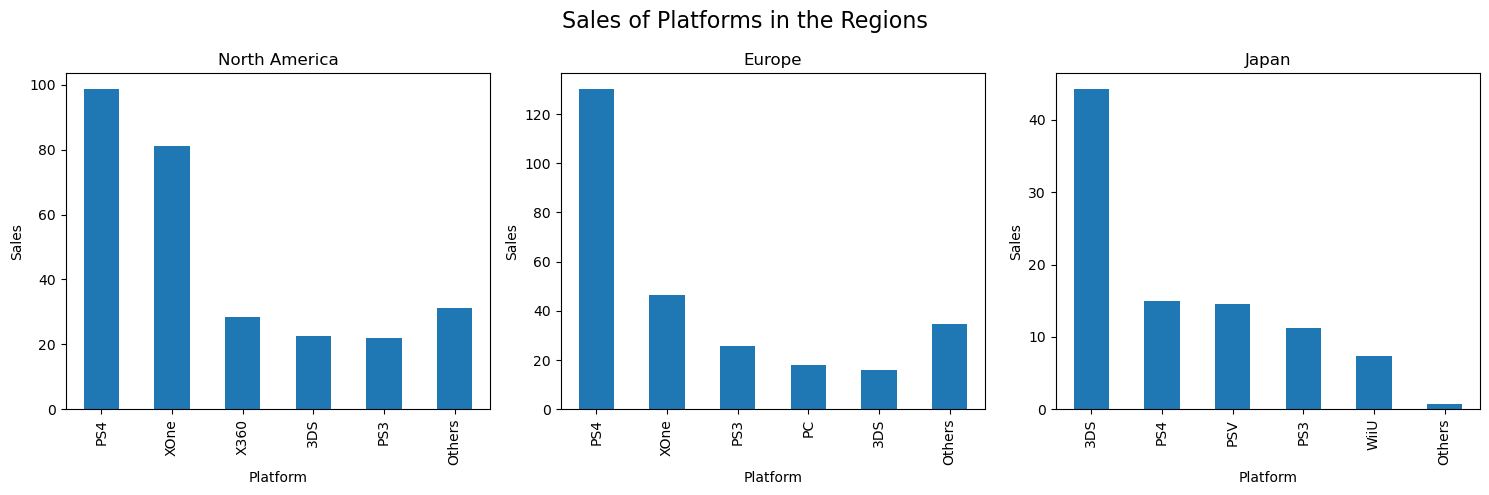

In [111]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
na_platforms.plot(kind='bar')
plt.title('North America')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
eu_platforms.plot(kind='bar')
plt.title('Europe')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
jp_platforms.plot(kind='bar')
plt.title('Japan')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.suptitle('Sales of Platforms in the Regions', fontsize=16)
plt.tight_layout()
plt.show()

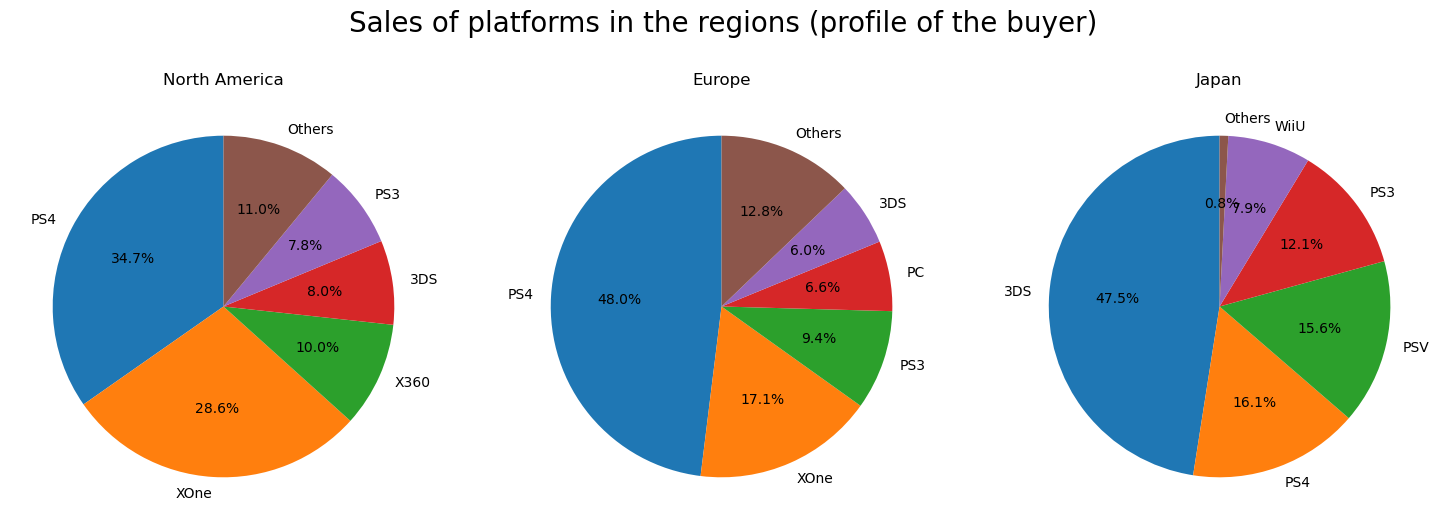

In [112]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(na_platforms, labels=na_platforms.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('North America')

axs[1].pie(eu_platforms, labels=eu_platforms.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Europe')

axs[2].pie(jp_platforms, labels=jp_platforms.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Japan')

plt.suptitle('Sales of platforms in the regions (profile of the buyer)', fontsize=20, y = 1.05)
plt.tight_layout()
plt.show()

Based on the data obtained, the following conclusions can be drawn:

**North America (NA):**

- The PS4 platform is the most popular with the highest sales.
- The Xone and X360 platforms also have a significant share in common sales.
- PS3 and 3DS close the five leaders, but with significantly smaller sales compared to leaders.

**Europe (EU):**

- In Europe, the same platform leads - PS4.
- PS3 and Xone occupy the second and third places, respectively.
- X360 and 3DS are also included in the top 5, but their share in sales is lower.

**Japan (JP):**

- In Japan, the picture differs: here is 3DS in the first place.
- PS3 takes the second place, and PSV - the third.
- PS4 and WIIU close the five leaders.

**Other** platforms occupy a small market share

This indicates different preferences of users in different regions.In Japan, for example, portable consoles and platforms of domestic manufacturers are popular.Stationary consoles are leading in North America and Europe, and among them - PlayStation 4.

None of the platforms dominates absolutely all three.This indicates significant differences in user preferences in different parts of the world.

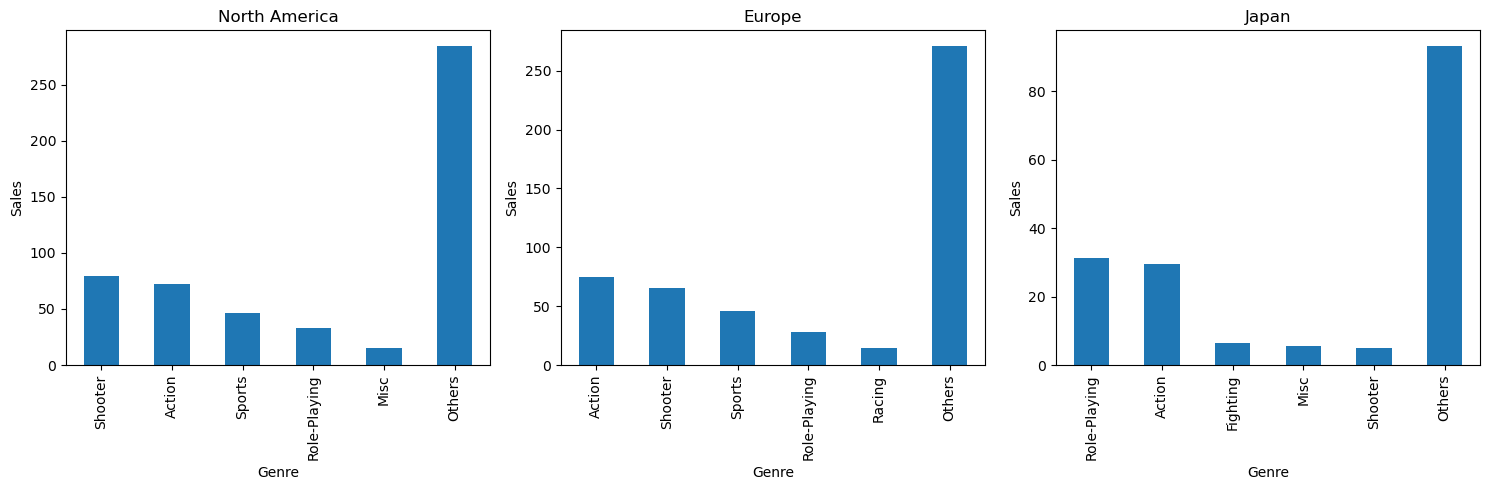

In [113]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
na_genres.plot(kind='bar')
plt.title('North America')
plt.xlabel('Genre')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
eu_genres.plot(kind='bar')
plt.title('Europe')
plt.xlabel('Genre')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
jp_genres.plot(kind='bar')
plt.title('Japan')
plt.xlabel('Genre')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

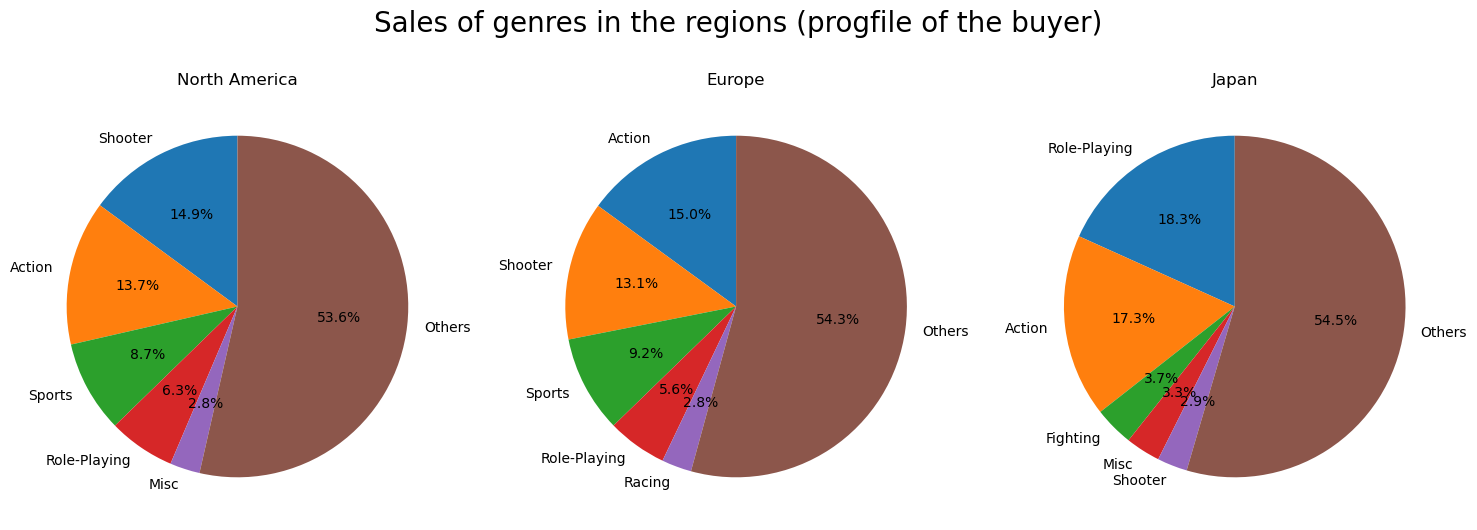

In [114]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(na_genres, labels=na_genres.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('North America')

axs[1].pie(eu_genres, labels=eu_genres.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Europe')

axs[2].pie(jp_genres, labels=jp_genres.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Japan')

plt.suptitle('Sales of genres in the regions (progfile of the buyer)', fontsize=20, y = 1.05)
plt.tight_layout()
plt.show()

In [115]:
jp_genres.describe()

count     6.000000
mean     28.446667
std      33.918016
min       4.870000
25%       5.800000
50%      17.975000
75%      30.765000
max      93.090000
Name: jp_sales, dtype: float64

Based on the data obtained, the following conclusions can be drawn:

**North America (NA)**

- The Action genre is the most popular, then it follows Shooter.
- Sports and Role-Playing genres are also popular, but sales in these genres are smaller.
- Other genres closing the five leaders.
- A little more than half of sales are occupied by all the remaining genres.

**Europe (EU):**

- As in North America, in Europe the most popular are the genres of Action and Shooter.
-Sports and Role-Playing are also included in the top 5, but their sales are smaller.
- The Racing genre is fifth in popularity in Europe.
- A little more than half of sales are occupied by all the remaining genres.

**Japan (JP):**

- In Japan, the picture is different: here the most popular genre is Role-Playing.
- Action takes the second place, and MISC - the third.
- Fighting and Shooter genres are closing the five leaders.
- A little more than half of sales are occupied by all the remaining genres.

Thus, in different regions, users prefer different genres of games.This may be due to the cultural, social and other characteristics of each region.It is important to consider these differences when planning marketing campaigns and sales strategies. More than half of sales in all regions are occupied by other genres that have not been included in the top 5 of the most popular

<h3>Impact ESRB rating</h3>

In [116]:
na_esrb_sales = actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_esrb_sales = actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_esrb_sales = actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

In [117]:
print('North America', na_esrb_sales, 'Europe', eu_esrb_sales, 'Japan', jp_esrb_sales, sep='\n')

North America
rating
M       96.42
NR      64.72
E       50.74
T       38.95
E10+    33.23
AO       0.00
EC       0.00
K-A      0.00
RP       0.00
Name: na_sales, dtype: float64
Europe
rating
M       93.44
NR      58.95
E       58.06
T       34.07
E10+    26.16
AO       0.00
EC       0.00
K-A      0.00
RP       0.00
Name: eu_sales, dtype: float64
Japan
rating
NR      56.90
T       14.78
E        8.94
M        8.01
E10+     4.46
AO       0.00
EC       0.00
K-A      0.00
RP       0.00
Name: jp_sales, dtype: float64


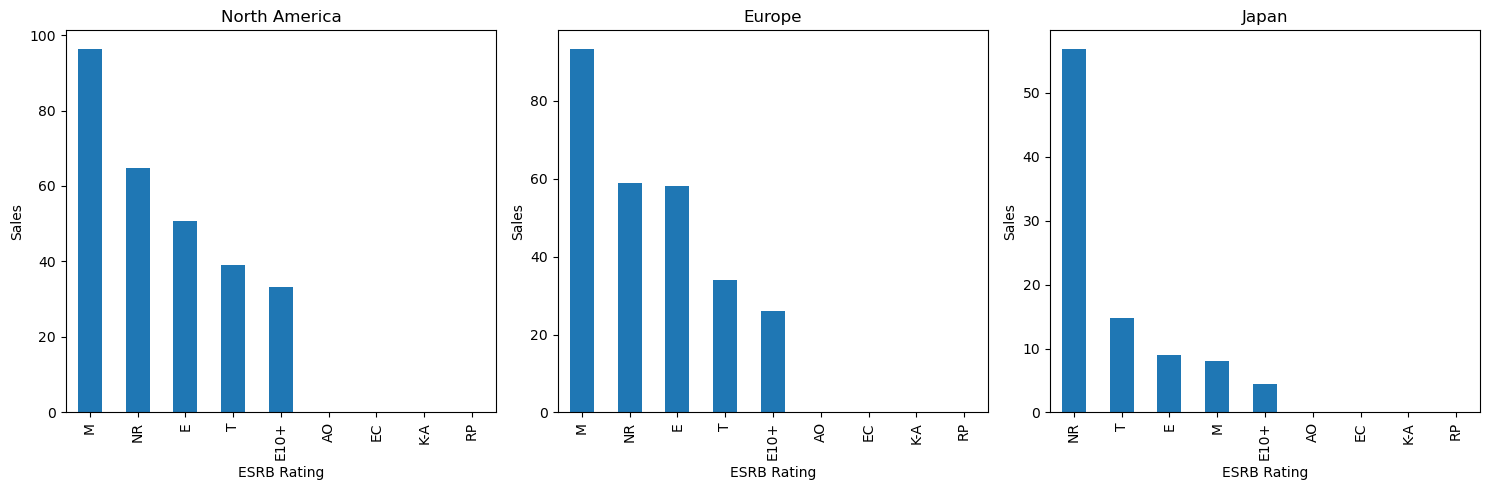

In [118]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
na_esrb_sales.plot(kind='bar')
plt.title('North America')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
eu_esrb_sales.plot(kind='bar')
plt.title('Europe')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
jp_esrb_sales.plot(kind='bar')
plt.title('Japan')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

**Conclusions:**

“K -a” (“Kids to Adults” - “for children and adults”, was used until 1997) and “Rating Pending” - “Rating is expected”) does not make sense to analyze, becauseThe data after 2013 is already released.

- North America: Games with the rating of "M" ("MATURE" - "for adults") are best sold, then games with "E" ratings ("EVERYONE" - "For all"), "E10+" ("EVERYONE"And Older ” -“ For all 10 years and older ”) and“ t ”(“ teen ” -“ teenagers ”).Games with the ratings "AOO" ("Adults only 18+" - "only for adults"), "EC" ("Early Childhood" - "For young children") were not sold at all.

- Europe: as well as in North America, games with the rating "M" are the best sold.They are followed by games with the ratings "E", "E10+" and "T".Games with the ratings "AO", "EC" were also not sold.

- Japan: unlike North America and Europe, in Japan, the best -selling games are rated "t" ("teen" - "teenagers").Games with ratings "E", "M" and "E10+" also have good sales, but less than "T".Games with the ratings "AO", "EC" were not sold.

It can be assumed that the games are “ADULTS only 18+” - “only for adults”), “EC” (“Early Childhood” - “for young children”) have an extremely narrow audience.

Based on these data, we can conclude that the ESRB rating affects the sales of games in each region.
In North America and Europe, games with the rating "M" are the best sold, while in Japan the games with the rating "T" are most sold.This may be due to the cultural differences and preferences of players in these regions.

**No rating:** "NR" boils "no rating", which means that these games were not evaluated by ESRB.This can happen if the game is too new to be evaluated, or if it was released before the creation of the ESRB rating system, or it concerns low-destructive or indie IRG.Perhaps for some games, there was simply no enough information to evaluate.

Sales of games with the NR rating are quite high in all three regions, which may indicate that the ESRB rating is not a key factor that determines the success of the game.This may be due to the fact that many players when choosing a game are guided by other factors, such as the genre of games, graphics, gameplay or reviews of other players.

However, it is worth noting that in North America and Europe the largest share of sales is occupied by games with the rating of "Mature" or "for adults"), which indicates a significant impact of the age rating on sales in these regions.While in Japan, games without a rating occupy the largest share of sales.

Such differences can be due to the cultural features and preferences of players in different regions.

<h2>Checking hypotheses</h2>

To check the hypotheses about the equality of average, we will use the T-criterion of the Student, since it is designed to check the hypotheses of the equality of average values in two samples

**The zero hypothesis H0:** The average user ratings of the Xbox One and PC platforms are equal.

**Alternative hypothesis H1:** The average user ratings of the Xbox One and PC platforms are different.

In [119]:
xone_scores = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'].notna())]['user_score']
pc_scores = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'].notna())]['user_score']

In [120]:
results = st.ttest_ind(xone_scores, pc_scores)

alpha = 0.05

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('reject the zero hypothesis')
else:
    print('There are no reason to reject the zero hypothesis')

p-value: 0.10450507919348415
There are no reason to reject the zero hypothesis


P-value is about 0.14.Thus, the probability of obtaining an observed or more extreme result if the zero hypothesis is true about 14%.

Given the threshold value of 0.05, based on the available data, it cannot be argued that the average user grades for games on Xbox One and PC are statistically significant.


The statistical test does not allow us to reject the zero hypothesis, in other words, the data does not contradict the hypothesis that the average user ratings of the Xbox One and PC platforms are the same.

**Zero Hypothesis H0:** Average user ratings of Action and Sports wounds.

**Alternative hypothesis H1**: The average user ratings of the Action and Sports genres are different.



In [121]:
action_scores = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'].notna())]['user_score']
sports_scores = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'].notna())]['user_score']

In [122]:
results = st.ttest_ind(action_scores, sports_scores)

alpha = 0.05

print(f'p-value: {results.pvalue}')

# Check P-Value
if results.pvalue < alpha:
    print('reject the zero hypothesis')
else:
    print('There are no reason to reject the zero hypothesis')

p-value: 2.8711147985105864e-19
reject the zero hypothesis


The results of the statistical test give us the grounds to reject the zero hypothesis about the equality of average user ratings of the Action and Sports genres.

P-value in this case is close to zero, which is much less than the accepted level of significance (alpha = 0.05).This means that the probability of getting the observed data, if the zero hypothesis is correct, is extremely small.Therefore, we have reason to reject the zero hypothesis.

However, it is worth remembering that the rejection of the zero hypothesis is not evidence of the reverse hypothesis.This only indicates that, with current data, it is unlikely to obtain such results, provided that the zero hypothesis is fidelled.

Nevertheless, our data do not contradict this alleged H1 hypothesis that Action and Sports genres have statistically significant average user ratings

<h1>Conclusion</h1>

During the analysis, a dataset was studied containing information about video games, their sales, platforms, estimates of users and critics, genres and age ratings.The main conclusions of the study are as follows:

**Trends in the gaming industry:** typical "life span" of the game platform for about 10 years.New platforms appear, gain popularity, then the peak of sales is replaced by a decline until the next generation of platforms replaces them.In 2017, the PS4 and Xone will become the most relevant platforms, they are at the stage of active growth and the sale of their games will probably continue to increase in the coming years, but it is worth expecting the soon new platforms.

***Based on these trends, to make more accurate decisions for the sale of games in 2017, the analysis was carried out for the current period since 2014.***

**Ratings and sales:** Critics ratings affect games sales more than user ratings.This may indicate that players trust professional reviews more when choosing games for purchase.

**Popular genres:** Action, Shooter and Sports genres attract the largest number of players.They occupy a large market share due to the large number of games released. At the same time, only more than half of the sales are occupied by genres that are not included in the TOP-5 of the most popular.

**Regional differences:** Players of players differ depending on the region.PS4 and Xone platforms are leading in North America and Europe, while Japan prefer 3DS more.Genre preferences also differ: in America and Europe, the genres of Action and Shooter are popular, in Japan-Role-Playing.

**ESRB rating and sales:** ESRB rating affects games sales in certain regions.In North America and Europe, games with the rating "M" (Mature, 17+) have the greatest sales, while the games with the rating "T" (Teen, 13+) are leading in Japan.This may be due to cultural and demographic differences between the regions.

At the same time, sales of games with the NR rating are quite high in all three regions, which may indicate that the ESRB rating is not a key factor determining the success of the game.

**Сhecking hypotheses:**
- Between the average user ratings of the Xbox One and PC platforms, there were no statistically significant differences.This may indicate that despite the differences in the technical characteristics of the platforms, users get approximately the same level of satisfaction from games on both platforms.
- The hypothesis that the average user ratings of the genres of Action and Sports wounds rejecting.

The results of the study can be useful to the sale of video games to determine the strategy and select games, genres and platforms for presenting in the assortment.Particular attention should be paid to the relevance of platforms, as well as take into account regional preferences of players. "